# HR Analytics: Employee Performance Analysis

**Dataset:** Employee Performance for HR Analytics (Kaggle)  
**Rows:** 17,414 employees  
**Objective:** Identify factors that drive KPI achievement and awards

---

## Libraries and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Dataset source: Kaggle
# Dataset name: Employee’s Performance for HR Analytics
# URL: https://www.kaggle.com/datasets/sanjanchaudhari/employees-performance-for-hr-analytics

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving Uncleaned_employees_final_dataset (1).csv to Uncleaned_employees_final_dataset (1).csv
User uploaded file "Uncleaned_employees_final_dataset (1).csv" with length 1144082 bytes


---

## 1. Data Loading and Exploration

In [ ]:
df=pd.read_csv('Uncleaned_employees_final_dataset (1).csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17416,64573,HR,region_7,Bachelors,f,referred,1,35,5.0,4,1,0,81


In [ ]:
df.shape

(17417, 13)

In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [ ]:
# checking for missing values, duplicates and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [ ]:
df['avg_training_score']=df['avg_training_score'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.7+ MB


In [ ]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,771
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1363
length_of_service,0


In [ ]:
df['education']=df.groupby('department')['education'].transform(lambda x: x.fillna(x.mode()[0]))
df['previous_year_rating']=df['previous_year_rating'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [ ]:
print(df.duplicated().sum())

2


In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


---

## 3. Exploratory Data Analysis (EDA)

In [ ]:
numeric_columns=df.select_dtypes(include=['int64','float64']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

In [ ]:
# Checking for outliers using IQR method
for col in numeric_columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  Lower=Q1-1.5*IQR
  Upper=Q3+1.5*IQR
  Outliers=df[(df[col]<Lower)|(df[col]>Upper)]
  print(f"{col} has {Outliers.shape[0]} outliers")


employee_id has 0 outliers
no_of_trainings has 3356 outliers
age has 453 outliers
previous_year_rating has 1974 outliers
length_of_service has 1083 outliers
KPIs_met_more_than_80 has 0 outliers
awards_won has 407 outliers
avg_training_score has 0 outliers


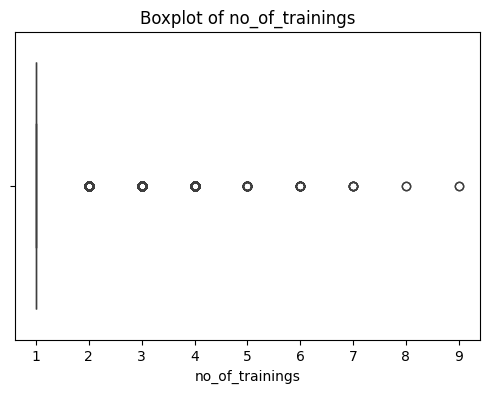

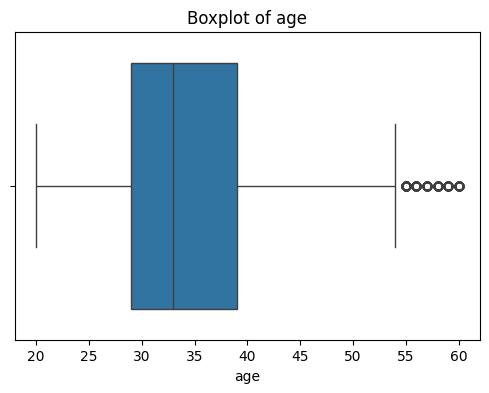

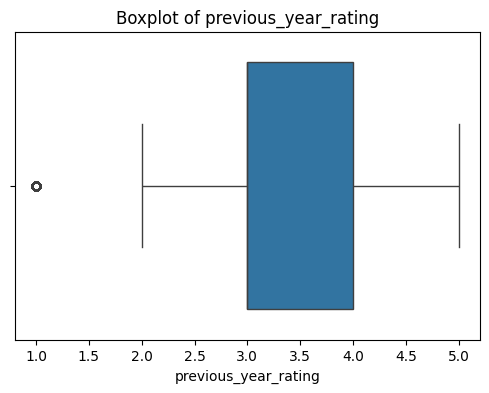

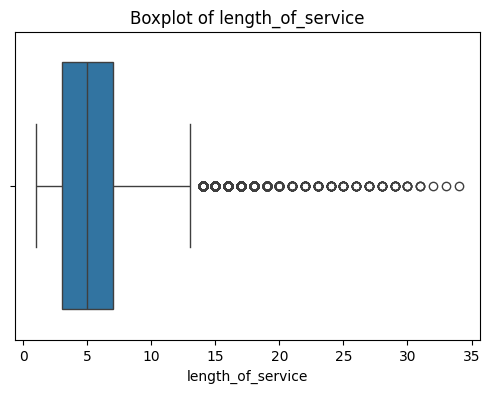

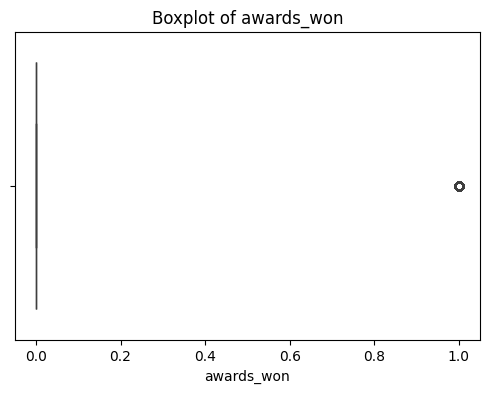

In [ ]:
numeric_cols = ['no_of_trainings','age','previous_year_rating','length_of_service','awards_won']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Checking distinct values for categorical columns
for col in categorical_columns:
  print(df[col].value_counts())
  print('*'*50)

department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    831
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64
**************************************************
region
region_2     3918
region_22    1990
region_7     1486
region_13     860
region_15     843
region_26     748
region_31     646
region_4      571
region_27     516
region_16     452
region_28     430
region_11     420
region_23     376
region_32     318
region_19     315
region_29     308
region_17     268
region_14     265
region_5      252
region_25     248
region_20     242
region_6      220
region_30     209
region_10     209
region_8      209
region_1      174
region_24     165
region_12     156
region_9      134
region_21     129
region_34     123
region_3      110
region_33      91
region_18      14
Name: count, dtype: int64
*********************************

In [ ]:
df['gender']=df['gender'].replace({'m':'Male' , 'f': 'Female'})
df['gender'].value_counts()

,count
gender,
Male,12312
Female,5103


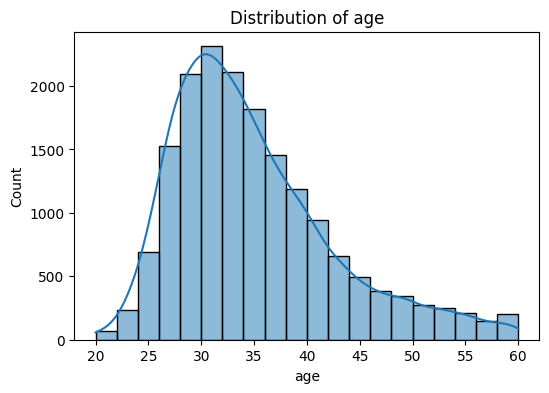

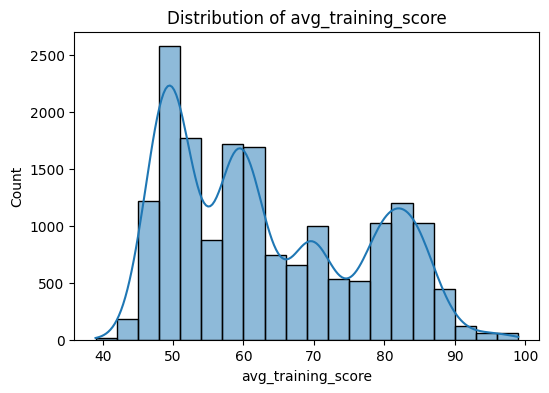

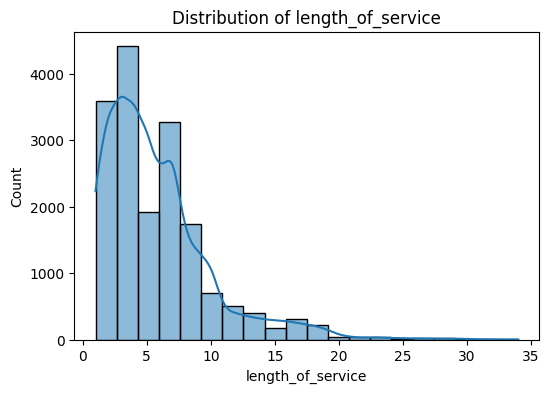

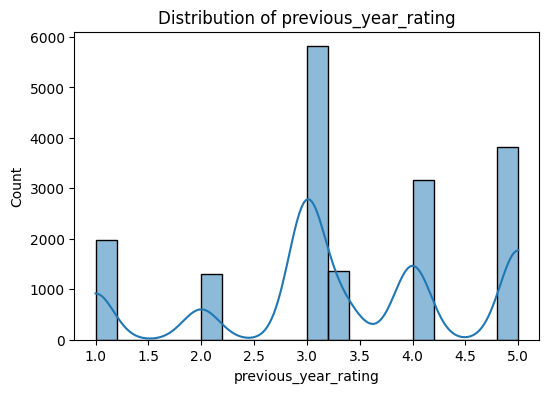

In [ ]:
for col in ['age', 'avg_training_score', 'length_of_service', 'previous_year_rating']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

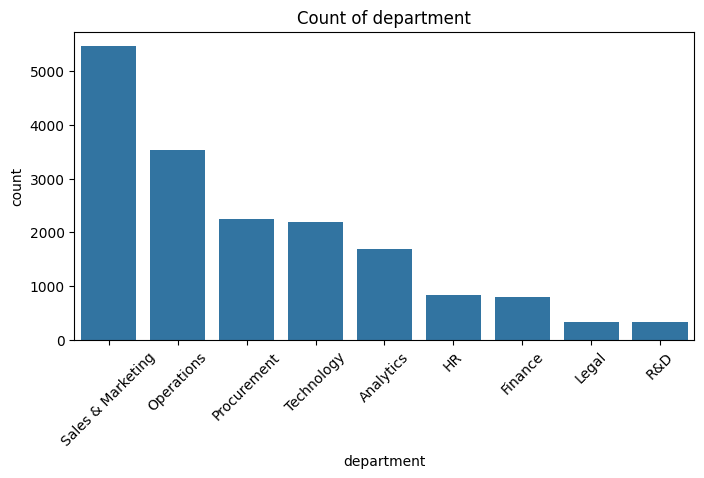

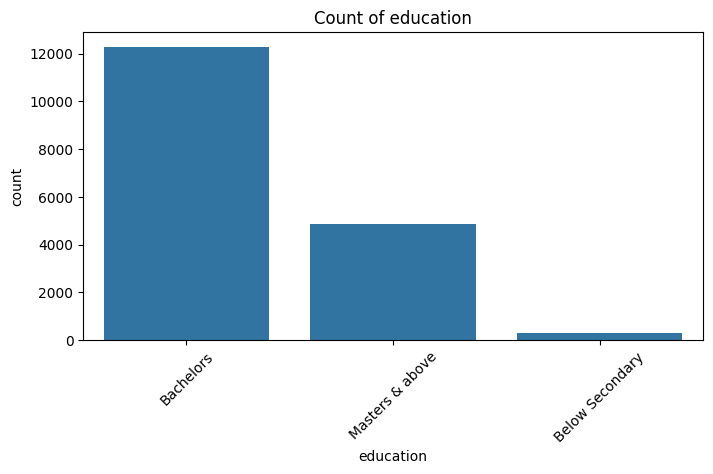

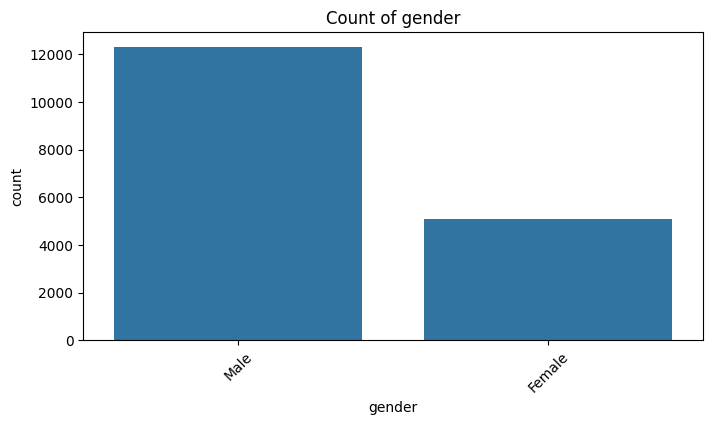

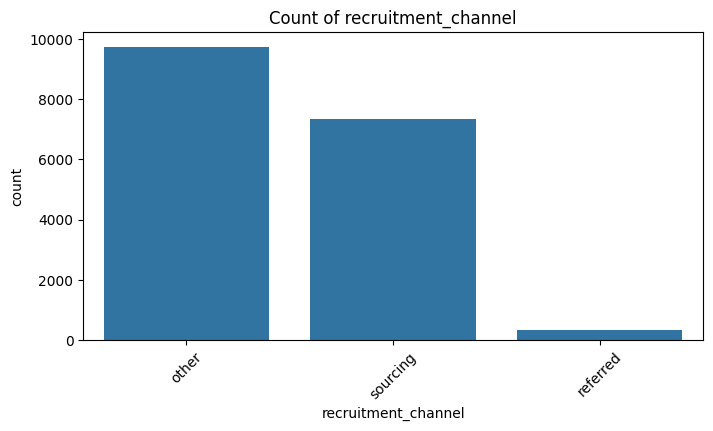

In [ ]:
for col in ['department', 'education', 'gender', 'recruitment_channel']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()

In [ ]:
# Grouping and aggregating data
df.groupby('department')['avg_training_score'].mean().sort_values(ascending=False)

,avg_training_score
department,
Analytics,84.565115
R&D,84.451807
Technology,79.847658
Procurement,70.180357
Operations,60.351589
Finance,60.326683
Legal,59.533133
HR,50.386282
Sales & Marketing,50.056614


In [ ]:
df.groupby('gender')['awards_won'].sum()

,awards_won
gender,
Female,128
Male,279


In [ ]:
df.groupby('recruitment_channel')['previous_year_rating'].mean()

,previous_year_rating
recruitment_channel,
other,3.328146
referred,3.923258
sourcing,3.344141


In [ ]:
df.groupby('education')['KPIs_met_more_than_80'].mean().sort_values(ascending=False)

,KPIs_met_more_than_80
education,
Below Secondary,0.465035
Masters & above,0.368312
Bachelors,0.352702


---

## 4. Analysis and Visualizations

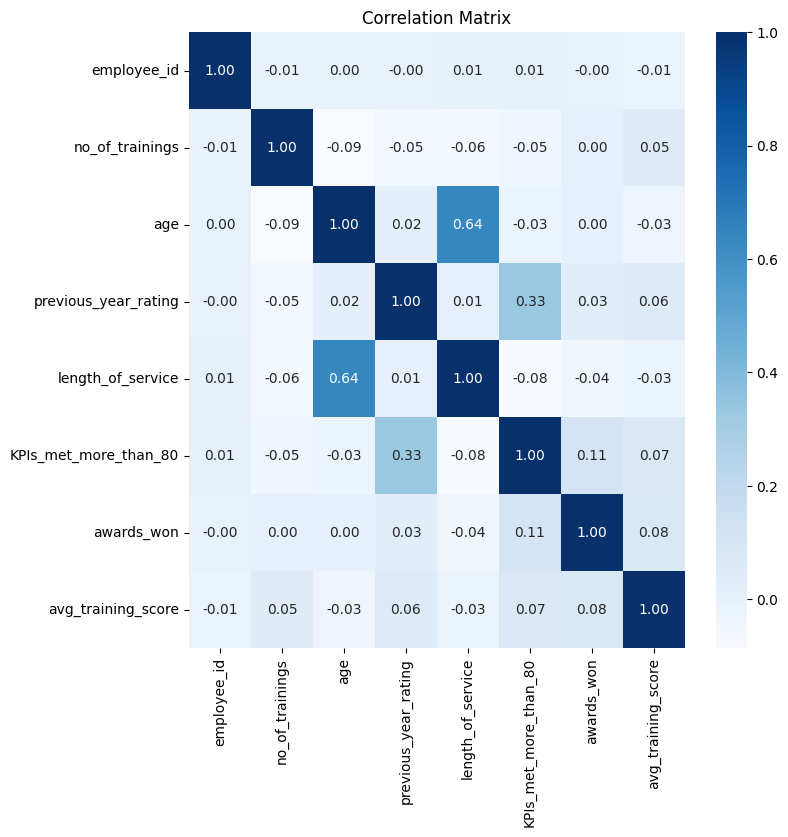

In [ ]:
corr=df[numeric_columns].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="Blues",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


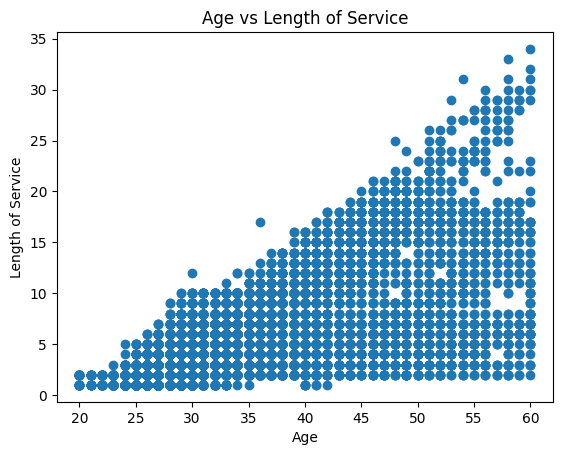

In [ ]:
plt.figure()
plt.scatter(df['age'],df['length_of_service'])
plt.xlabel('Age')
plt.ylabel('Length of Service')
plt.title('Age vs Length of Service')
plt.show()

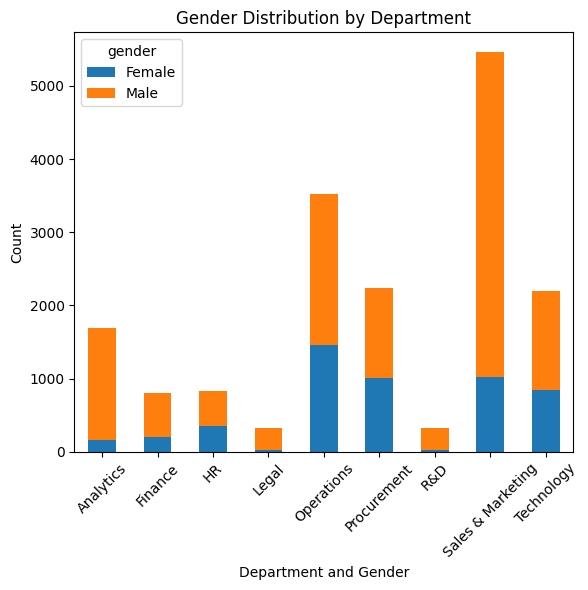

In [ ]:
df.groupby(['department','gender']).size().unstack().plot(kind='bar', stacked=True, figsize=(6,6))
plt.xlabel('Department and Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Avg Training Score by Number of Trainings')

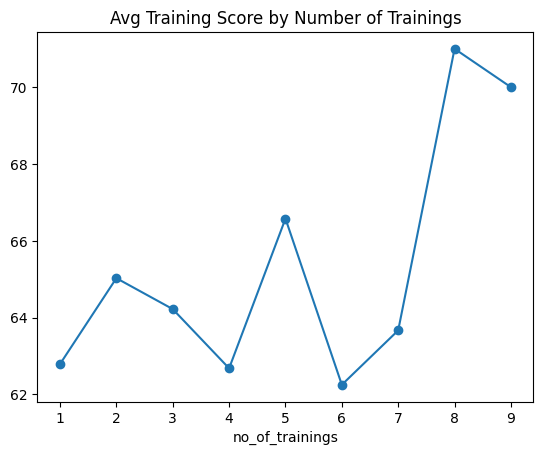

In [ ]:
df.groupby('no_of_trainings')['avg_training_score'].mean().plot(kind='line', marker='o')
plt.title('Avg Training Score by Number of Trainings')

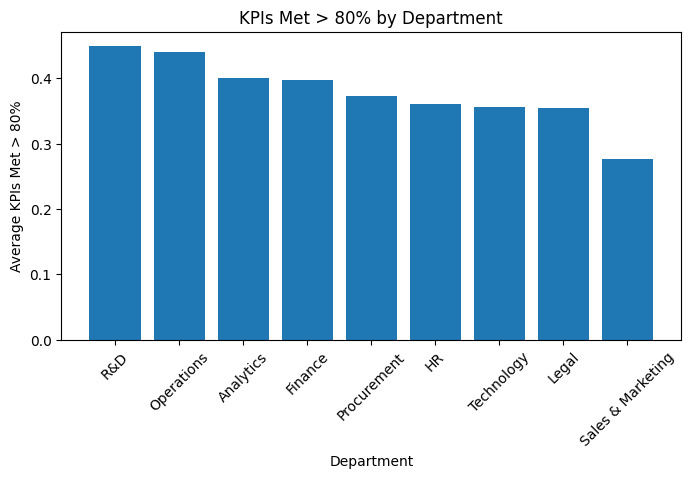

In [ ]:
kpi=df.groupby('department')['KPIs_met_more_than_80'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(kpi.index, kpi.values)
plt.xlabel('Department')
plt.ylabel('Average KPIs Met > 80%')
plt.title('KPIs Met > 80% by Department')
plt.xticks(rotation=45)
plt.show()

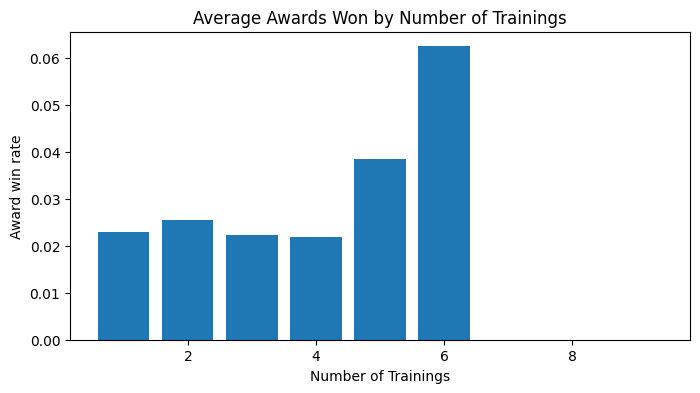

In [ ]:
train_awards=df.groupby('no_of_trainings')['awards_won'].mean()
plt.figure(figsize=(8,4))
plt.bar(train_awards.index, train_awards.values)
plt.xlabel('Number of Trainings')
plt.ylabel('Award win rate')
plt.title('Average Awards Won by Number of Trainings')
plt.show()

In [ ]:
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

fig = px.treemap(region_counts, path=['region'], values='count',
                 title='Employee Distribution by Region')
fig.show()

# Key Findings & Insights

After analyzing 17,414 employee records, here are the main insights:

## 1. Department Performance Varies Significantly
- **R&D and Operations** have the highest KPI achievement rates at 44%, while **Sales & Marketing** has the lowest at 27%
- This 17-point gap suggests different performance expectations or support structures across departments

## 2. Awards Are Rare and Concentrated
- Only **2.3% of employees** (407 out of 17,414) won awards
- **Sales & Marketing** won the most awards (120) despite having the lowest KPI rate
- This suggests awards may recognize different behaviors than KPI achievement

## 3. Previous Performance Strongly Predicts Current Performance
- Employees with a rating of 5.0 have a **63% KPI achievement rate**
- Employees with a rating of 1.0 have only a **13% KPI achievement rate**
- Past performance is the strongest predictor available in this dataset

## 4. Training Quantity ≠ Training Quality
- The relationship between number of trainings and performance is **non-linear**
- More trainings don't guarantee better outcomes
- Training **score** matters more than training **count**

## 5. Recruitment Channel Matters
- **Referred employees** have the highest average previous year rating (3.44)
- **Other** recruitment channels have the lowest (3.19)
- This suggests referrals bring in higher-quality candidates

## 6. Demographics Show Expected Patterns
- Workforce is **70.7% male, 29.3% female**
- Average age is **35 years** with **5.8 years of service**
- Age correlates positively with length of service (as expected)

---

# Data Preparation for SQL Database

The following cells prepare the cleaned data for loading into SQL Server by:
1. Creating dimension tables (Departments, Regions, Employees)
2. Creating a fact table with foreign key references
3. Exporting all tables as CSV files for BULK INSERT

This follows a **star schema design** where the fact table sits in the center with foreign keys pointing to dimension tables.

In [ ]:
# Create Departments dimension

departments = df[['department']].drop_duplicates().reset_index(drop=True)
departments.insert(0, 'department_id', range(1, len(departments) + 1))
departments.to_csv('departments.csv', index=False)

In [ ]:
# Create Regions dimension

regions = df[['region']].drop_duplicates().reset_index(drop=True)
regions.insert(0, 'region_id', range(1, len(regions) + 1))
regions.to_csv('regions.csv', index=False)

In [ ]:
# Create Employees dimension

employees = df[['employee_id', 'gender', 'age', 'education',
                'recruitment_channel', 'length_of_service']].drop_duplicates(subset='employee_id').copy()
employees.to_csv('employees.csv', index=False)

In [ ]:
# Create Fact table

fact=df.merge(departments, on='department', how='left')

fact=fact.merge(regions, on='region', how='left')

fact=fact[['employee_id', 'department_id', 'region_id',
             'KPIs_met_more_than_80', 'awards_won',
             'avg_training_score', 'previous_year_rating',
             'no_of_trainings']].copy()
fact = fact.drop_duplicates(subset='employee_id').copy()

fact.insert(0, 'fact_id', range(1, len(fact) + 1))

fact.to_csv('fact.csv', index=False)

In [ ]:
print(fact.head())
print(fact.isna().sum())
print(fact.shape)

   fact_id  employee_id  department_id  region_id  KPIs_met_more_than_80  \
0        1         8724              1          1                      1   
1        2        74430              2          2                      0   
2        3        72255              3          3                      0   
3        4        38562              4          4                      0   
4        5        64486              5          5                      0   

   awards_won  avg_training_score  previous_year_rating  no_of_trainings  
0           0                77.0              3.345459                1  
1           0                51.0              3.000000                1  
2           0                47.0              1.000000                1  
3           0                65.0              2.000000                3  
4           0                61.0              4.000000                1  
fact_id                  0
employee_id              0
department_id            0
region_id   

In [ ]:
from google.colab import files
files.download('departments.csv')
files.download('regions.csv')
files.download('employees.csv')
files.download('fact.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>